In [1]:
!pip install scrapy
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-3build2).
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import json
import scrapy
from scrapy.crawler import CrawlerProcess

class firstStopSpider(scrapy.Spider):

    def __init__(self):
        super()
        self.results = {}
        self.body = {
            'SEARCH_VALUE': 'X',
            'STARTS_WITH_YN': 'true',
            'ACTIVE_ONLY_YN': 'true'
        } 

    def start_requests(self):
        yield scrapy.http.JsonRequest(
            'https://firststop.sos.nd.gov/api/Records/businesssearch',
            callback=self.parse_businesses,
            data=self.body)

    def parse_businesses(self, response):
        jsonresponse = json.loads(response.text)
        for k, v in jsonresponse['rows'].items():
            self.results[k] = {
                'Business Name': v['TITLE'][0],
            }
            yield scrapy.http.Request(
                'https://firststop.sos.nd.gov/api/FilingDetail/business/' + k +
                '/false',
                callback=self.parse_business_info,
                headers = {'Accept': '*/*',
                  'Cookie': 'ASP.NET_SessionId=dhp0c0ayc5kbjkqj2qbb1naf',
                  'Referer': 'https://firststop.sos.nd.gov/search/business',
                  'Accept-Language': 'en-US,en;q=0.9',
                  'Host': 'firststop.sos.nd.gov',
                  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15',
                  'Authorization': 'undefined',
                  'Accept-Encoding': 'gzip, deflate, br',
                  'Connection': 'keep-alive'},
                cb_kwargs={'row_id': k},
                method='GET')

    def parse_business_info(self, response, row_id):
        json_response = json.loads(response.text)
        current = self.results[row_id]
        detail_list = json_response['DRAWER_DETAIL_LIST']
        for item in detail_list:
            current[item['LABEL']] = item['VALUE']
        
    @staticmethod
    def close(spider, reason):
        with open('firstStopSpider_data.json', 'w', encoding='utf-8') as f:
            json.dump(spider.results, f, ensure_ascii=False)
        super().close(spider, reason)

In [3]:
process = CrawlerProcess(settings={
    'CLOSESPIDER_PAGECOUNT': 195,
    'DOWNLOAD_DELAY': 1
})
process.crawl(firstStopSpider)
process.start()

INFO:scrapy.utils.log:Scrapy 2.8.0 started (bot: scrapybot)
2023-03-13 11:27:12 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.0.0 (OpenSSL 3.0.8 7 Feb 2023), cryptography 39.0.2, Platform Linux-5.10.147+-x86_64-with-glibc2.31
2023-03-13 11:27:12 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.0.0 (OpenSSL 3.0.8 7 Feb 2023), cryptography 39.0.2, Platform Linux-5.10.147+-x86_64-with-glibc2.31
INFO:scrapy.crawler:Overridden settings:
{'CLOSESPIDER_PAGECOUNT': 195, 'DOWNLOAD_DELAY': 1}
2023-03-13 11:27:12 [scrapy.crawler] INFO: Overridden settings:
{'CLOSESPIDER_PAGECOUNT': 195, 'DOWNLOAD_DELAY': 1}
/usr/local/lib/python3.9/dist-packa

In [6]:
import random

import matplotlib.pyplot as plt
import networkx as nx

company_info = ['Business Name', 'Owner', 'Registered Agent', 'Commercial Registered Agent']

def create_graph(data):
    nodes = set()
    edges = set()
    for _, v in data.items():
        for category in company_info[1:]:
            if category in v:
                nodes.add((v[category], category))
                edges.add(((v[category], category), (v[company_info[0]], company_info[0])))

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

def plot_data(G):
    plt.figure(1, figsize=(10, 10))
    # layout graphs with positions using graphviz neato
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
    # color nodes the same in each connected subgraph
    C = (G.subgraph(c) for c in nx.connected_components(G))
    for g in C:
        c = [random.random()] * nx.number_of_nodes(g)  # random color...
        nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
    plt.show()

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-03-13 11:32:21 [matplotlib.axes._base] DEBUG: top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-03-13 11:32:21 [matplotlib.axes._base] DEBUG: top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-03-13 11:32:21 [matplotlib.axes._base] DEBUG: top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
2023-03-13 11:32:22 [matplotlib.axes._base] DEBUG: top of Axes not in the figure, so title not moved


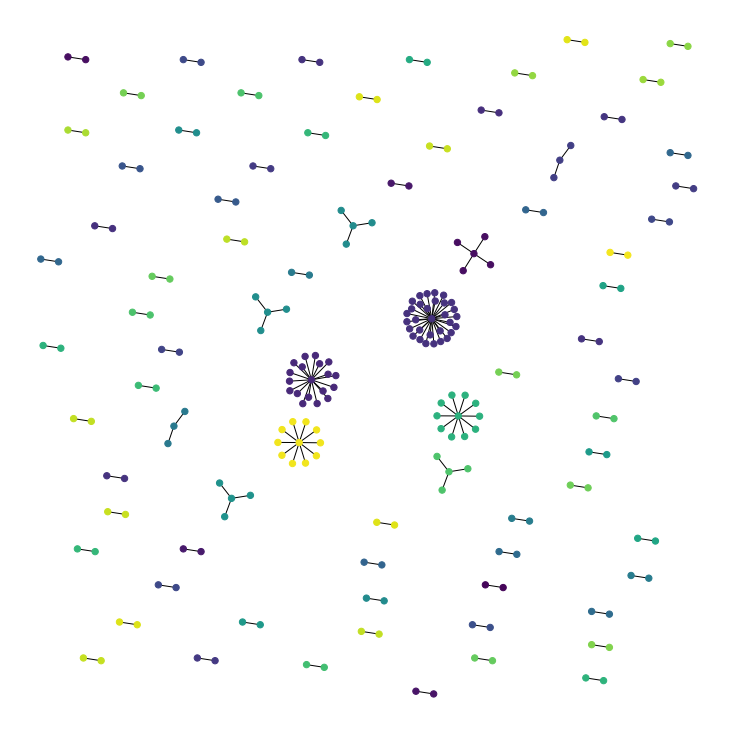

In [7]:
with open('firstStopSpider_data.json') as f:
    data = json.load(f)
graph = create_graph(data)
plot_data(graph)